# Tarjeta de datos 1

### Hipótesis 1: "Las provincias con una edad media menor y una renta media por hogar mayor a la nacional, suelen estar más concienciadas con el uso de energías renovables y utilizan más dispositivos que aprovechan este tipo de energía."

La justificación de esta hipótesis es que las personas jóvenes suelen estar más concienciadas con el medio ambiente, además de que tienen más tiempo para amortizar la inversión de este tipo de tecnología a lo largo de su vida.
<br>
<br>

### Preparación del entorno

In [731]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from ydata_profiling import ProfileReport
import os 

SILVER_DATA_PATH = os.path.join("..", "data/silver/")
GOLD_DATA_PATH = os.path.join("..", "data/gold/")

### Datos

Primero, cargamos los datasets que utilizaremos en esta tarjeta, los cuales han sido generados a partir del procesamiento inicial de los datos y corresponden a la capa silver.

In [732]:
# Distribución de edad
distribucion_edad_df=pd.read_csv(SILVER_DATA_PATH+"distribucion_edad.csv", sep = ";", encoding = "latin")
distribucion_edad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Provincias                  987 non-null    object
 1   Edad (grupos quinquenales)  987 non-null    object
 2   Total                       987 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


In [733]:
# Renta media
renta_media_hogar_df = pd.read_csv(SILVER_DATA_PATH+"renta_media_hogar.csv", sep = ";", encoding = "latin")
renta_media_hogar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincias  141 non-null    object
 1   Periodo     141 non-null    int64 
 2   Total       141 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


In [734]:
# Dispositivos de energía renovable
dispositivos_renovable_df=pd.read_csv(SILVER_DATA_PATH+"dispositivos_renovable.csv", sep = ";", encoding = "latin")
dispositivos_renovable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Provincias                                   470 non-null    object
 1   Ingresos netos                               470 non-null    object
 2   Dispone de dispositivo de energía renovable  470 non-null    object
 3   Total                                        470 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.8+ KB


### Procesamiento

#### distribucion_edad_df

Del dataset distribucion_edad_df.csv queremos obtener la información sobre los intervalos de edad de cada año por provincia, además de:

- El total nacional del número de habitantes.
- La edad media por provincia.
- El número de habitantes por provincia.

In [735]:
# Ejemplo de los datos que presenta la tabla
distribucion_edad_df.head(5)

,Provincias,Edad (grupos quinquenales),Total
0,Almería,De 0 a 4 años,36360
1,Almería,De 5 a 9 años,41033
2,Almería,De 10 a 14 años,43411
3,Almería,De 15 a 19 años,40722
4,Almería,De 20 a 24 años,41532


Total nacional del número de habitantes.

In [736]:
# Calcular la suma de la columna 'Total'
poblacion_total_nacional = distribucion_edad_df['Total'].sum()
print(f"Hay un total de {poblacion_total_nacional} habitantes en España.")

Hay un total de 43952773 habitantes en España.


Edad media por provincia

In [737]:
# Función para obtener la edad media de cada grupo quinquenal
def obtener_edad_media(grupo):
    # Comprobar si el grupo es "100 y más años"
    if "100 y más años" in grupo:
        return 100  # Asignamos 100 años como la edad media para este grupo
    else:
        # Extraer los valores del rango (e.g., "De 0 a 4 años" -> 0, 4)
        partes = grupo.split(' a ')
        edad_inferior = int(partes[0].split(' ')[1])
        edad_superior = int(partes[1].split(' ')[0])
        # Calcular la edad media del grupo
        return (edad_inferior + edad_superior) / 2
    
# Crear un contenedor para almacenar los resultados de edad media por provincia
edad_media_por_provincia = []
# Agrupamos los datos por provincia
for provincia, grupo in distribucion_edad_df.groupby('Provincias'):
    edad_media_nivel_provincia = 0
    poblacion_total_provincia = 0
    
    # Calculamos la edad media ponderada para cada grupo quinquenal en la provincia
    for index, row in grupo.iterrows():
        rango_edad = row['Edad (grupos quinquenales)']
        media_rango = obtener_edad_media(rango_edad)
        
        # Sumar la edad media ponderada por la población
        edad_media_ponderada = media_rango * row['Total']
        edad_media_nivel_provincia += edad_media_ponderada
        poblacion_total_provincia += row['Total']
    
    # Calcular la edad media real de la provincia
    edad_media_provincia = edad_media_nivel_provincia / poblacion_total_provincia
    edad_media_por_provincia.append({'Provincias': provincia, 'Edad media': edad_media_provincia})

# Crear un DataFrame con las provincias y su edad media
df_edad_media_provincia = pd.DataFrame(edad_media_por_provincia)

# Mostrar el DataFrame con la edad media por provincia
print(df_edad_media_provincia)



            Provincias  Edad media
0             Albacete   43.677523
1     Alicante/Alacant   43.766889
2              Almería   40.320448
3          Araba/Álava   44.565691
4             Asturias   48.683390
5              Badajoz   43.780701
6            Barcelona   42.892178
7              Bizkaia   46.103248
8               Burgos   46.686045
9            Cantabria   45.913933
10  Castellón/Castelló   43.510425
11         Ciudad Real   44.066242
12           Coruña, A   47.242613
13              Cuenca   45.921312
14             Cáceres   46.531672
15               Cádiz   42.212285
16             Córdoba   43.693785
17            Gipuzkoa   45.145398
18              Girona   42.243670
19             Granada   42.746625
20         Guadalajara   41.696196
21              Huelva   42.099644
22              Huesca   45.258330
23                Jaén   43.765870
24                León   49.246042
25              Lleida   43.240681
26                Lugo   49.987228
27              Madr

Número de habitantes por provincia

In [738]:
# Agrupar por 'Provincias' y calcular el sumatorio de la columna 'Total'
poblacion_total_provincias = distribucion_edad_df.groupby('Provincias')['Total'].sum().reset_index()
poblacion_total_provincias.head(5)


,Provincias,Total
0,Albacete,385727
1,Alicante/Alacant,1901594
2,Almería,740534
3,Araba/Álava,334412
4,Asturias,1004686


Se modifica el nombre de la columna "Total" para mejorar su comprensión.

In [739]:
poblacion_total_provincias = poblacion_total_provincias.rename(columns={'Total': 'Población Total'})

<br>
<br>

#### renta_media_hogar_df 

El objetivo con el dataset renta_media_hogar_df es conocer la renta media de cada provincia.

In [740]:
# Ejemplo de los datos que presenta la tabla
renta_media_hogar_df.head(5)

,Provincias,Periodo,Total
0,Almería,2022,28442
1,Almería,2021,27184
2,Almería,2020,26276
3,Cádiz,2022,30055
4,Cádiz,2021,28501


In [741]:
# Nos quedamos con los datos del 2022
renta_media_hogar_df = renta_media_hogar_df[renta_media_hogar_df['Periodo'] == 2022]
renta_media_hogar_df = renta_media_hogar_df.reset_index(drop=True)

# Eliminamos la columna 'Periodo'
renta_media_hogar_df = renta_media_hogar_df.drop('Periodo', axis=1)

renta_media_hogar_df.head(5)

,Provincias,Total
0,Almería,28442
1,Cádiz,30055
2,Córdoba,29082
3,Granada,29113
4,Huelva,29133


Calculamos la renta media nacional.

In [742]:
renta_media_nacional = renta_media_hogar_df['Total'].mean()

print(f"La renta media nacional por hogar es de {renta_media_nacional} euros.")


La renta media nacional por hogar es de 33008.31914893617 euros.


Se modifica el nombre de la columna "Total" para mejorar su comprensión.

In [743]:
renta_media_hogar_df = renta_media_hogar_df.rename(columns={'Total': 'Renta media por hogar'})

<br>
<br>


#### dispositivos_renovable_df

In [744]:
# Ejemplo de los datos que presenta la tabla
dispositivos_renovable_df.head(5)

,Provincias,Ingresos netos,Dispone de dispositivo de energía renovable,Total
0,Albacete,3.000 euros o más,No,13390
1,Albacete,3.000 euros o más,Si,1344
2,Albacete,De 1.000 euros a menos de 1.500 euros,No,38883
3,Albacete,De 1.000 euros a menos de 1.500 euros,Si,2260
4,Albacete,De 1.500 euros a menos de 2.000 euros,No,22329


Queremos generar un dataset que indique el porcentaje de la provincia que utiliza dispositivos de energía renovable

In [745]:
# Agrupar por 'Provincias' y 'Dispone de dispositivo de energía renovable', sumando el total
dispositivos_renovable_df = dispositivos_renovable_df.groupby(['Provincias', 'Dispone de dispositivo de energía renovable'])['Total'].sum().unstack(fill_value=0)
dispositivos_renovable_df.head(5)

Dispone de dispositivo de energía renovable,No,Si
Provincias,,
Albacete,146255,6594
Alicante/Alacant,735245,30923
Almería,248102,17856
Araba/Álava,126383,14741
Asturias,431584,22865


In [746]:
# Se calcula el porcentaje de hogares con dispositivos de energía renovable y se eliminan las columnas "Si" y "No"
dispositivos_renovable_df['Porcentaje de hogares con dispositivos de energía renovable'] = (dispositivos_renovable_df['Si'] / (dispositivos_renovable_df['Si'] + dispositivos_renovable_df['No']))*100
dispositivos_renovable_df.drop(columns=['No', 'Si'], inplace=True)
dispositivos_renovable_df.head(5)

Dispone de dispositivo de energía renovable,Porcentaje de hogares con dispositivos de energía renovable
Provincias,
Albacete,4.314062
Alicante/Alacant,4.036060
Almería,6.713842
Araba/Álava,10.445424
Asturias,5.031368


In [747]:
# Las columnas están estructuradas como un MultiIndex, el objetivo es "aplanarlas" y dejar el dataset como | Provincias | Proporción ... |
dispositivos_renovable_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in dispositivos_renovable_df.columns]
dispositivos_renovable_df.reset_index(inplace=True)

dispositivos_renovable_df.head(5)

,Provincias,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,4.314062
1,Alicante/Alacant,4.036060
2,Almería,6.713842
3,Araba/Álava,10.445424
4,Asturias,5.031368


<br>


### Resultado

In [748]:
# Unir DataFrames
data_card_1_df = pd.merge(poblacion_total_provincias, renta_media_hogar_df, on='Provincias')
data_card_1_df = pd.merge(data_card_1_df, df_edad_media_provincia, on='Provincias')
data_card_1_df = pd.merge(data_card_1_df, dispositivos_renovable_df, on='Provincias')


data_card_1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,385727,30908,43.677523,4.314062
1,Alicante/Alacant,1901594,28965,43.766889,4.036060
2,Almería,740534,28442,40.320448,6.713842
3,Araba/Álava,334412,38586,44.565691,10.445424
4,Asturias,1004686,33242,48.683390,5.031368


Datos importantes

In [749]:
print(f"Hay un total de {poblacion_total_nacional} habitantes en España.")
print(f"La renta media nacional por hogar es de {renta_media_nacional} euros.")

Hay un total de 43952773 habitantes en España.
La renta media nacional por hogar es de 33008.31914893617 euros.


<br>

### Data Profiling

Estudio sobre población total de España.

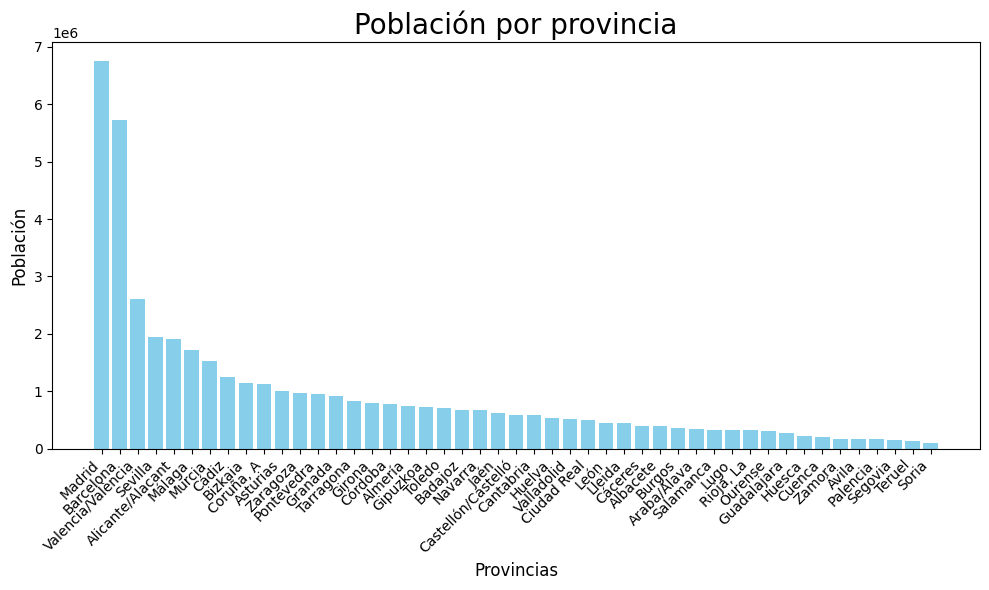

In [750]:
df = pd.DataFrame(data_card_1_df)
df = df.sort_values(by="Población Total", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(df["Provincias"], df["Población Total"], color='skyblue')

# Agregar títulos y etiquetas
plt.title("Población por provincia", fontsize=20)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("Población", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Estudio sobre la renta media por hogar en cada provincia.

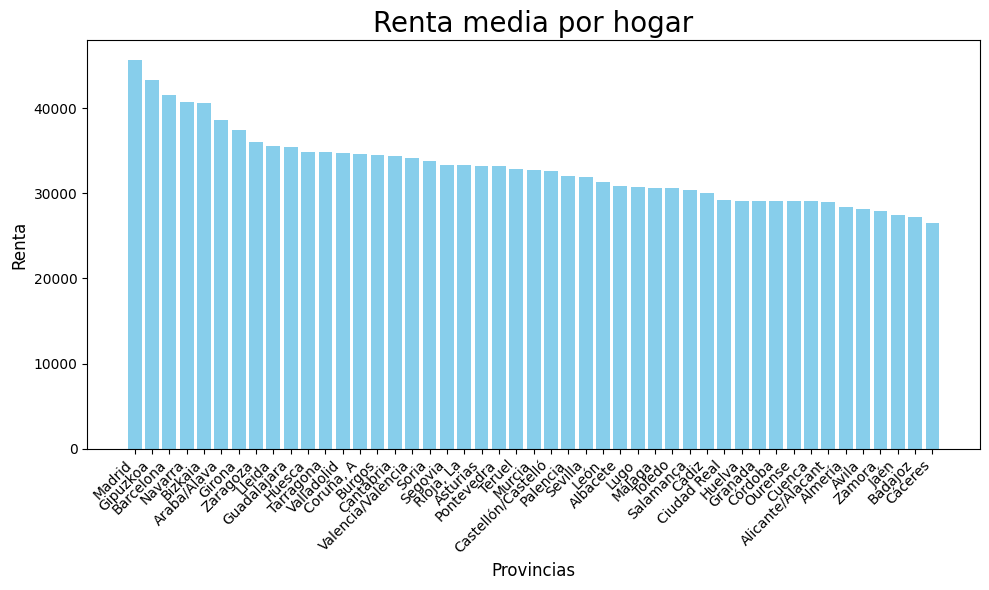

In [751]:
df = pd.DataFrame(data_card_1_df)
df = df.sort_values(by="Renta media por hogar", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(df["Provincias"], df["Renta media por hogar"], color='skyblue')

# Agregar títulos y etiquetas
plt.title("Renta media por hogar", fontsize=20)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("Renta", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Estudio sobre la edad media en cada provincia.

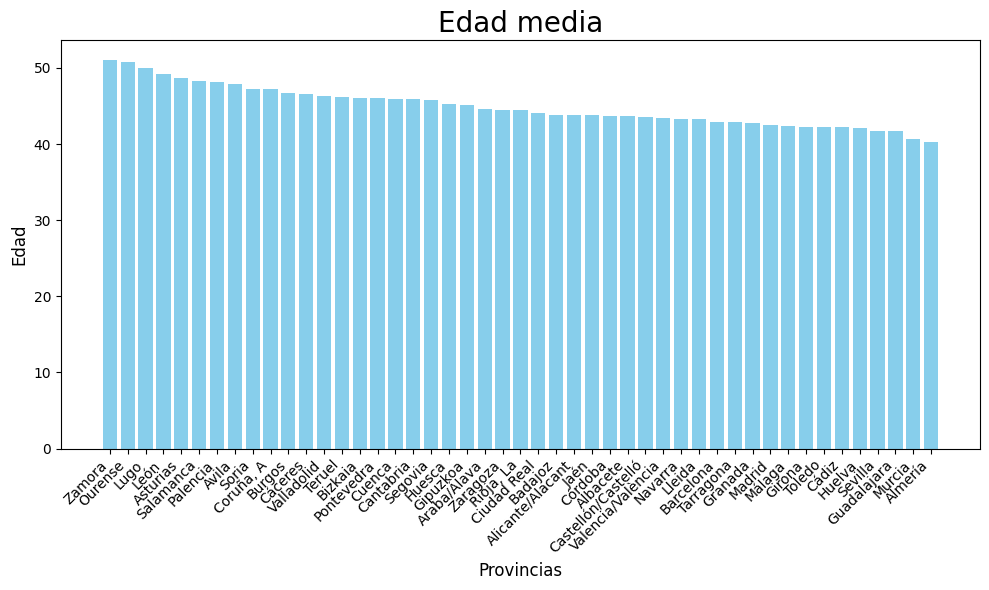

In [752]:
df = pd.DataFrame(data_card_1_df)
df = df.sort_values(by="Edad media", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(df["Provincias"], df["Edad media"], color='skyblue')

# Agregar títulos y etiquetas
plt.title("Edad media", fontsize=20)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Estudio sobre la proporción de hogares con dispositivos de energía renovable.

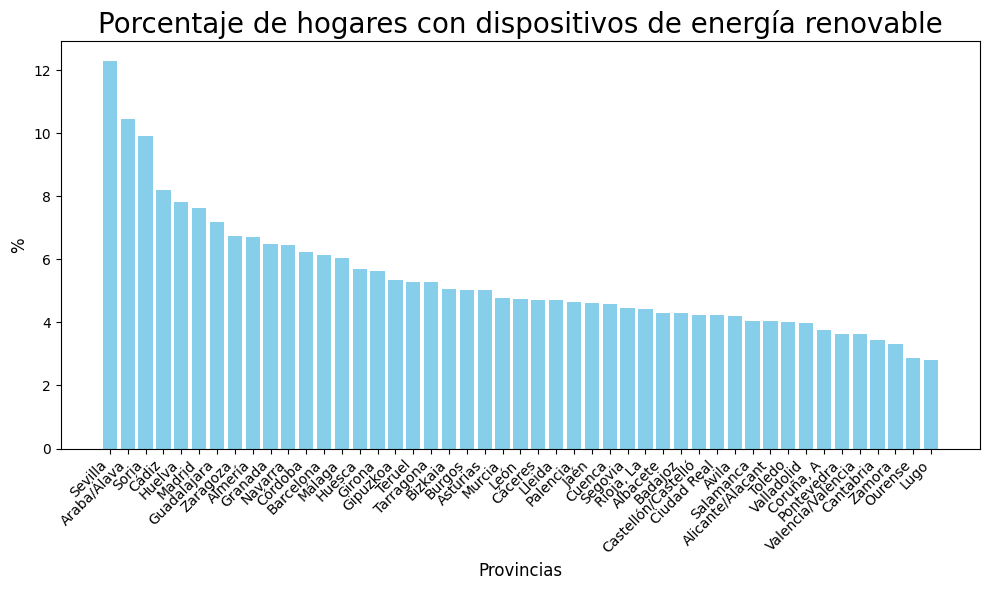

In [753]:
df = pd.DataFrame(data_card_1_df)
df = df.sort_values(by="Porcentaje de hogares con dispositivos de energía renovable", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(df["Provincias"], df["Porcentaje de hogares con dispositivos de energía renovable"], color='skyblue')

# Agregar títulos y etiquetas
plt.title("Porcentaje de hogares con dispositivos de energía renovable", fontsize=20)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("%", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Generamos un profile report del estudio.

In [754]:
profile = ProfileReport(data_card_1_df, title="Data Card 1 - Profile", explorative=True)
profile.to_file("data_card_1_profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<?, ?it/s]


<br>

### Generar dataset

In [755]:
with open(GOLD_DATA_PATH + "data_card_1_df.csv", "w") as f:
    data_card_1_df.to_csv(f, sep=';', encoding='utf-8')